In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_csv('access_logs_201612.txt',sep=" ", header = None)

In [3]:
dct = {func.__name__:df.apply(func) for func in (pd.Series.nunique, pd.Series.count)}
print(pd.concat(dct, axis=1))

      count  nunique
0   2529245       42
1   2529245        1
2   2529245        1
3   2529245       17
4   2529245    86400
5   2529245        1
6   2529245    34185
7   2529245       11
8   2529245    12414
9   2529245       67
10  2529245       30
11  2529245   745036
12  2529245    12741
13  2529245   274309


In [4]:
df = df.drop(df.columns[[1,2,5]], axis=1)
df.rename(columns={0: 'ip',3: 'date',4: 'time',6:'request',7:'rc',8:'size',9:'referer',10:'client',11:'in',12:'out',13:'us'}, inplace=True)
df[:3]

,ip,date,time,request,rc,size,referer,client,in,out,us
0,147.214.18.128,2016-11-27,03:16:03,GET /rawdata-dispatcher/progress/count?executi...,rc:200,22,-,Apache-HttpClient/4.3.3 (java 1.5),in:244,out:223,us:2545
1,147.214.18.128,2016-11-27,03:16:05,GET /rawdata-dispatcher/progress/count?executi...,rc:200,21,-,Apache-HttpClient/4.3.3 (java 1.5),in:244,out:222,us:2187
2,localhost,2016-11-27,03:16:07,GET /server-status?auto HTTP/1.1,rc:200,387,-,collectd/5.5.1,in:94,out:585,us:475


In [5]:
df.insert(loc=3, column='datetime', value=pd.to_datetime(df['date'] + ' ' + df['time']))
df = df.drop('date', axis=1)
df = df.drop('time', axis=1)
df[:3]

,ip,datetime,request,rc,size,referer,client,in,out,us
0,147.214.18.128,2016-11-27 03:16:03,GET /rawdata-dispatcher/progress/count?executi...,rc:200,22,-,Apache-HttpClient/4.3.3 (java 1.5),in:244,out:223,us:2545
1,147.214.18.128,2016-11-27 03:16:05,GET /rawdata-dispatcher/progress/count?executi...,rc:200,21,-,Apache-HttpClient/4.3.3 (java 1.5),in:244,out:222,us:2187
2,localhost,2016-11-27 03:16:07,GET /server-status?auto HTTP/1.1,rc:200,387,-,collectd/5.5.1,in:94,out:585,us:475


In [6]:
df.rc.unique()

array(['rc:200', 'rc:400', 'rc:404', 'rc:500', 'rc:406', 'rc:302',
       'rc:301', 'rc:401', 'rc:502', 'rc:304', 'rc:503'], dtype=object)

In [7]:
df.insert(loc=4, column='fail', value=(df.rc!='rc:200').astype(int))
df = df.drop('rc', axis=1)
df[:3]

,ip,datetime,request,fail,size,referer,client,in,out,us
0,147.214.18.128,2016-11-27 03:16:03,GET /rawdata-dispatcher/progress/count?executi...,0,22,-,Apache-HttpClient/4.3.3 (java 1.5),in:244,out:223,us:2545
1,147.214.18.128,2016-11-27 03:16:05,GET /rawdata-dispatcher/progress/count?executi...,0,21,-,Apache-HttpClient/4.3.3 (java 1.5),in:244,out:222,us:2187
2,localhost,2016-11-27 03:16:07,GET /server-status?auto HTTP/1.1,0,387,-,collectd/5.5.1,in:94,out:585,us:475


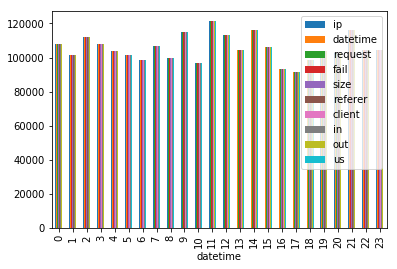

In [8]:
df.groupby(df["datetime"].dt.hour).count().plot(kind="bar")

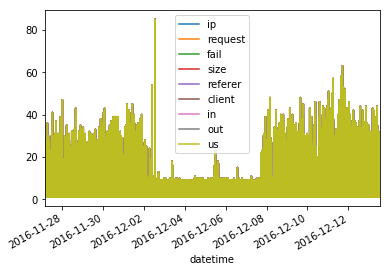

In [9]:
df.groupby(df["datetime"]).count().plot()

In [10]:
df.set_index('datetime', inplace=True)
df[:3]

,ip,request,fail,size,referer,client,in,out,us
datetime,,,,,,,,,
2016-11-27 03:16:03,147.214.18.128,GET /rawdata-dispatcher/progress/count?executi...,0,22,-,Apache-HttpClient/4.3.3 (java 1.5),in:244,out:223,us:2545
2016-11-27 03:16:05,147.214.18.128,GET /rawdata-dispatcher/progress/count?executi...,0,21,-,Apache-HttpClient/4.3.3 (java 1.5),in:244,out:222,us:2187
2016-11-27 03:16:07,localhost,GET /server-status?auto HTTP/1.1,0,387,-,collectd/5.5.1,in:94,out:585,us:475


In [11]:
ts=df.resample('1S').apply({'ip':'nunique','request':'nunique','fail':'sum','size':'count'})
ts.rename(columns={'size': 'number'}, inplace=True)
ts=ts.fillna(0)
ts

,fail,ip,request,number
datetime,,,,
2016-11-27 03:16:03,0.0,1,1,1
2016-11-27 03:16:04,0.0,0,0,0
2016-11-27 03:16:05,0.0,1,1,1
2016-11-27 03:16:06,0.0,0,0,0
2016-11-27 03:16:07,0.0,1,1,1
2016-11-27 03:16:08,0.0,1,2,2
2016-11-27 03:16:09,0.0,0,0,0
2016-11-27 03:16:10,0.0,1,3,3
2016-11-27 03:16:11,0.0,1,3,6
